In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from functions import all_models as m
from functions import metrics, plot_importances

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(font_scale=2)

In [2]:
df=pd.read_csv('Cleaned Data.csv', index_col=0)
df.head()

,Subject Age Group,Subject ID,Stop Resolution,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Actionable Stop,Weapon,Officer Age Group,Day of Week,Year,Month
0,26 - 35,0,No Action,1,White,Asian,Male,No Call,0.0,0.0,Gen X,Friday,2015,April
1218,1 - 17,0,No Action,1,White,White,Female,No Call,0.0,0.0,Millenial,Sunday,2015,May
1598,1 - 17,0,Arrest,1,White,American Indian or Alaska Native,Male,No Call,1.0,0.0,Millenial,Sunday,2015,September
1599,1 - 17,0,No Action,0,Not Specified,Unknown,Male,No Call,0.0,0.0,Millenial,Sunday,2015,April
1600,1 - 17,0,No Action,1,White,Black or African American,Male,No Call,0.0,0.0,Gen X,Sunday,2015,April


In [3]:
y = df['Stop Resolution']
x = df.drop(columns=['Stop Resolution', 'Actionable Stop'])

In [4]:
x = pd.get_dummies(x, drop_first=True, columns=['Subject Age Group', 'Officer Race', 'Subject Perceived Race', 
                                                'Subject Perceived Gender', 'Weapon', 'Call Type',
                                                'Officer Age Group', 'Day of Week', 'Year', 'Month'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=16)

## Initial Model

The vanilla model will use "Stop Resolution" as the target variable. We will run several different types of models to determine which models will be the most useful for tuning.

Logistic Regression Results:


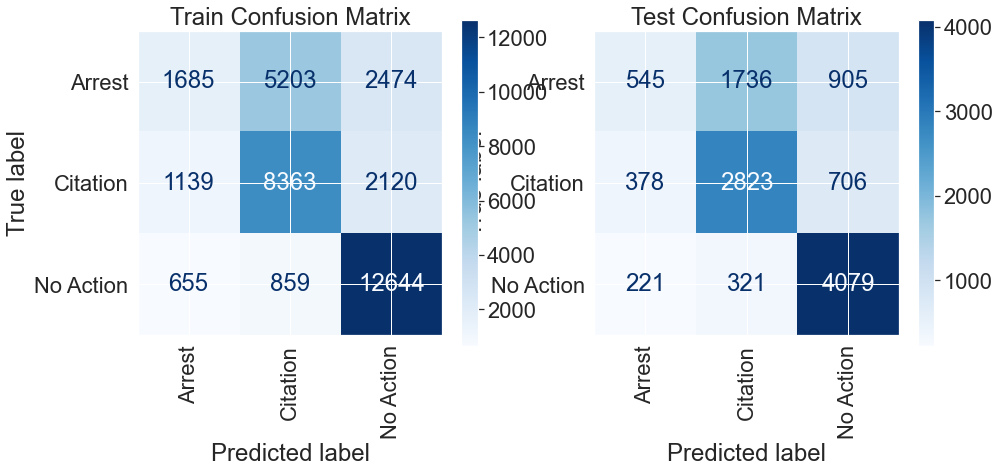

              precision    recall  f1-score   support

      Arrest       0.48      0.17      0.25      3186
    Citation       0.58      0.72      0.64      3907
   No Action       0.72      0.88      0.79      4621

    accuracy                           0.64     11714
   macro avg       0.59      0.59      0.56     11714
weighted avg       0.61      0.64      0.59     11714



K-Nearest Neighbors Results:


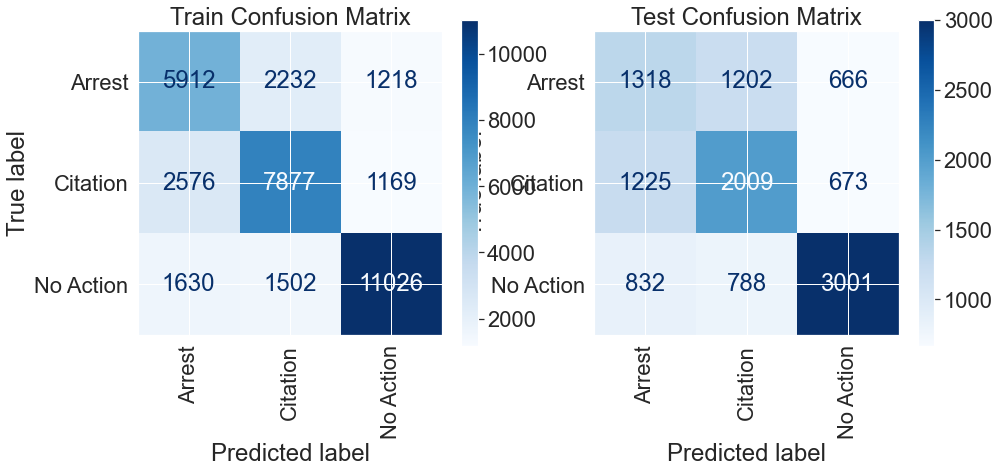

              precision    recall  f1-score   support

      Arrest       0.39      0.41      0.40      3186
    Citation       0.50      0.51      0.51      3907
   No Action       0.69      0.65      0.67      4621

    accuracy                           0.54     11714
   macro avg       0.53      0.53      0.53     11714
weighted avg       0.55      0.54      0.54     11714



Naive Bayes Results:


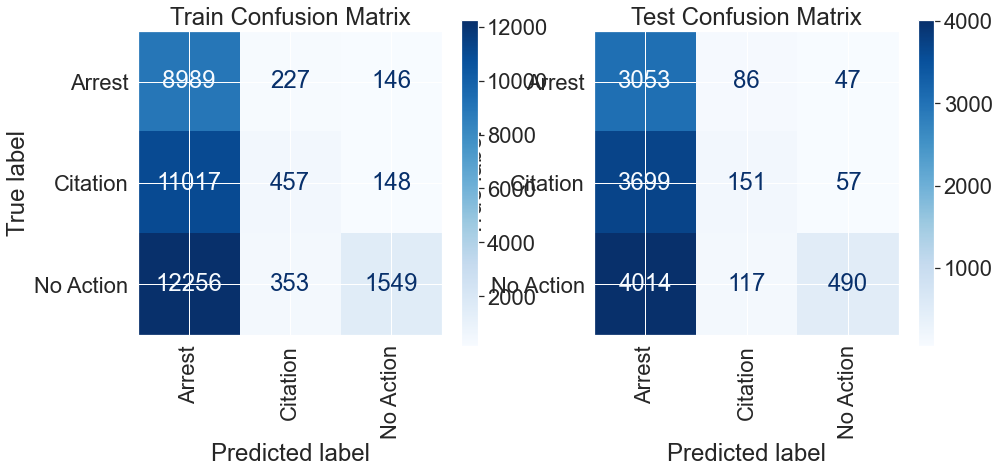

              precision    recall  f1-score   support

      Arrest       0.28      0.96      0.44      3186
    Citation       0.43      0.04      0.07      3907
   No Action       0.82      0.11      0.19      4621

    accuracy                           0.32     11714
   macro avg       0.51      0.37      0.23     11714
weighted avg       0.54      0.32      0.22     11714



Decision Tree Results:


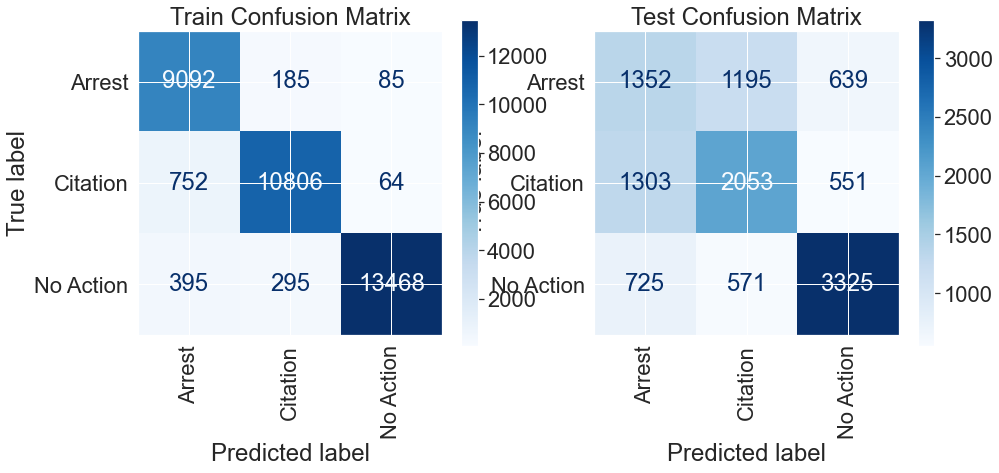

              precision    recall  f1-score   support

      Arrest       0.40      0.42      0.41      3186
    Citation       0.54      0.53      0.53      3907
   No Action       0.74      0.72      0.73      4621

    accuracy                           0.57     11714
   macro avg       0.56      0.56      0.56     11714
weighted avg       0.58      0.57      0.58     11714



Random Forest Results:


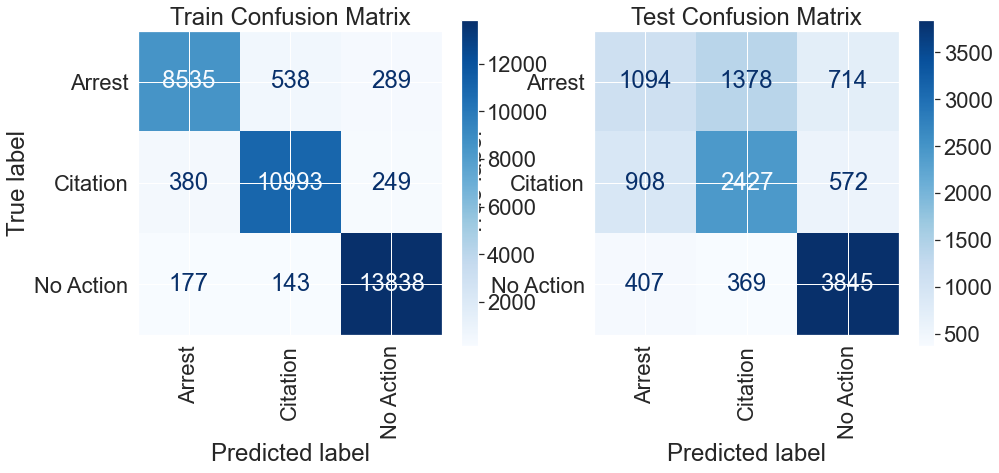

              precision    recall  f1-score   support

      Arrest       0.45      0.34      0.39      3186
    Citation       0.58      0.62      0.60      3907
   No Action       0.75      0.83      0.79      4621

    accuracy                           0.63     11714
   macro avg       0.59      0.60      0.59     11714
weighted avg       0.61      0.63      0.62     11714



XGBoost Results:
[21:11:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


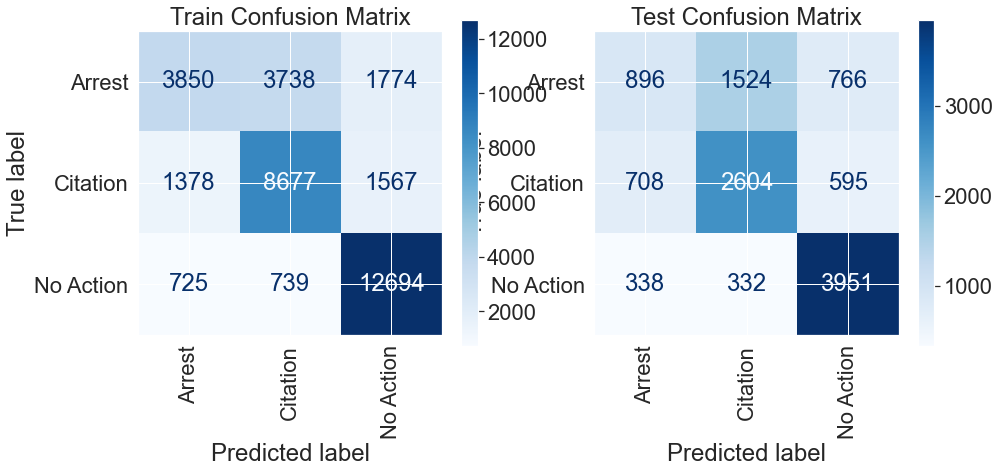

              precision    recall  f1-score   support

      Arrest       0.46      0.28      0.35      3186
    Citation       0.58      0.67      0.62      3907
   No Action       0.74      0.86      0.80      4621

    accuracy                           0.64     11714
   macro avg       0.60      0.60      0.59     11714
weighted avg       0.61      0.64      0.62     11714



Support Vector Machine Results:


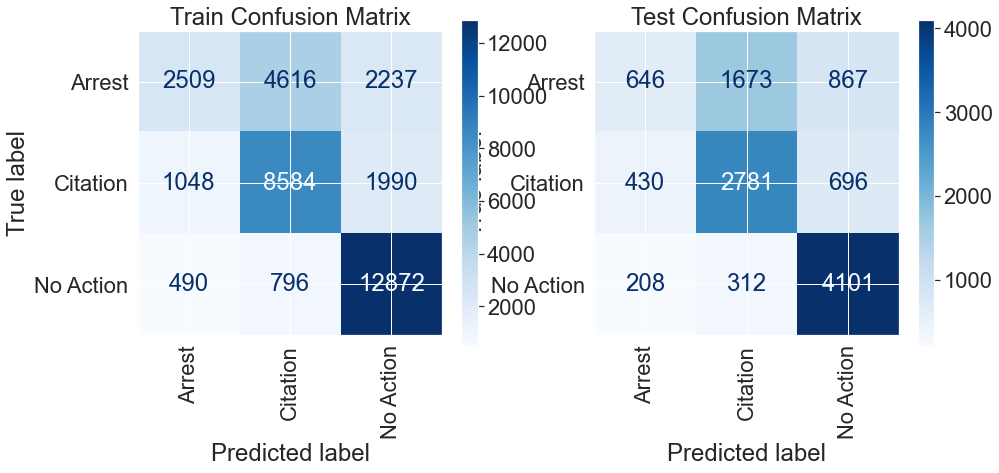

              precision    recall  f1-score   support

      Arrest       0.50      0.20      0.29      3186
    Citation       0.58      0.71      0.64      3907
   No Action       0.72      0.89      0.80      4621

    accuracy                           0.64     11714
   macro avg       0.60      0.60      0.58     11714
weighted avg       0.62      0.64      0.61     11714





,Precision Score,Recall Score,Accuracy Score,F1 Score
Logistic Regression,59.06%,59.21%,63.57%,56.18%
K-Nearest Neighbors,52.81%,52.58%,54.02%,52.66%
Naive Bayes,51.17%,36.76%,31.53%,23.21%
Decision Tree,55.80%,55.65%,57.45%,55.71%
Random Forest,59.50%,59.89%,62.88%,59.34%
XGBoost,59.63%,60.09%,63.61%,58.91%
Support Vector Machine,60.36%,60.07%,64.26%,57.59%


The model with the highest precision score is Support Vector Machine.
The model with the highest recall score is XGBoost.
The model with the highest accuracy score is Support Vector Machine.
The model with the highest F1 score is Random Forest.


In [6]:
models = m(x_train, x_test, y_train, y_test)

Write something here

## Iteration 1 -- Reduce to Binary Classification Problem

Write something here

In [7]:
y_2 = df['Actionable Stop']
x_2 = df.drop(columns=['Stop Resolution', 'Actionable Stop'])

In [9]:
x_2 = pd.get_dummies(x_2, drop_first=True, columns=['Subject Age Group', 'Officer Race', 'Subject Perceived Race', 
                                                'Subject Perceived Gender', 'Weapon', 'Call Type',
                                                'Officer Age Group', 'Day of Week', 'Year', 'Month'])

In [10]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_2, y_2, random_state=16)

Logistic Regression Results:


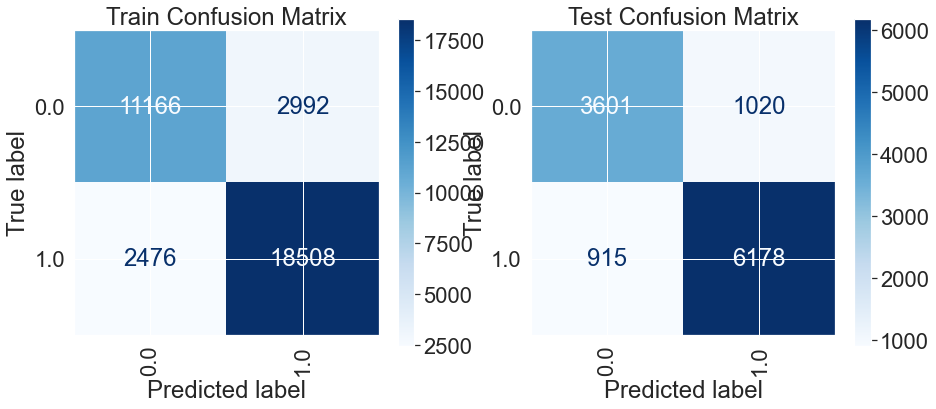

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      4621
         1.0       0.86      0.87      0.86      7093

    accuracy                           0.83     11714
   macro avg       0.83      0.83      0.83     11714
weighted avg       0.83      0.83      0.83     11714



K-Nearest Neighbors Results:


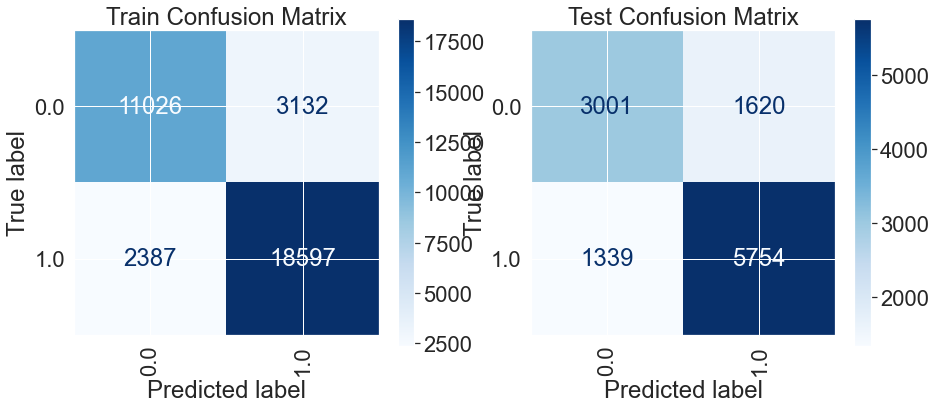

              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67      4621
         1.0       0.78      0.81      0.80      7093

    accuracy                           0.75     11714
   macro avg       0.74      0.73      0.73     11714
weighted avg       0.75      0.75      0.75     11714



Naive Bayes Results:


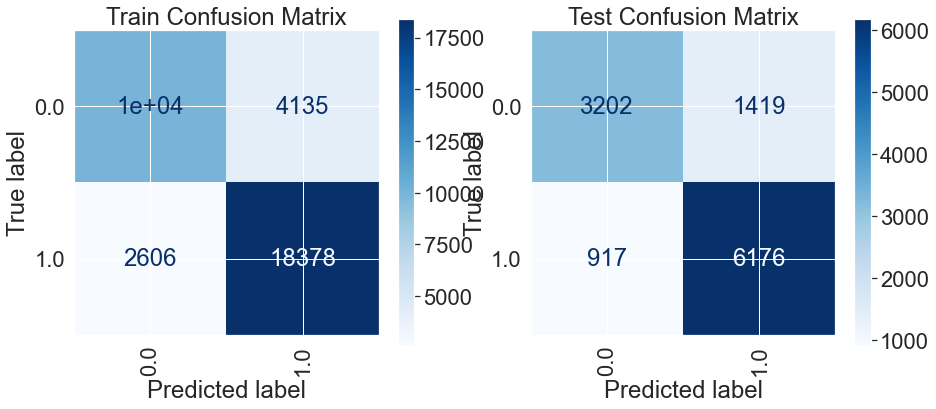

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      4621
         1.0       0.81      0.87      0.84      7093

    accuracy                           0.80     11714
   macro avg       0.80      0.78      0.79     11714
weighted avg       0.80      0.80      0.80     11714



Decision Tree Results:


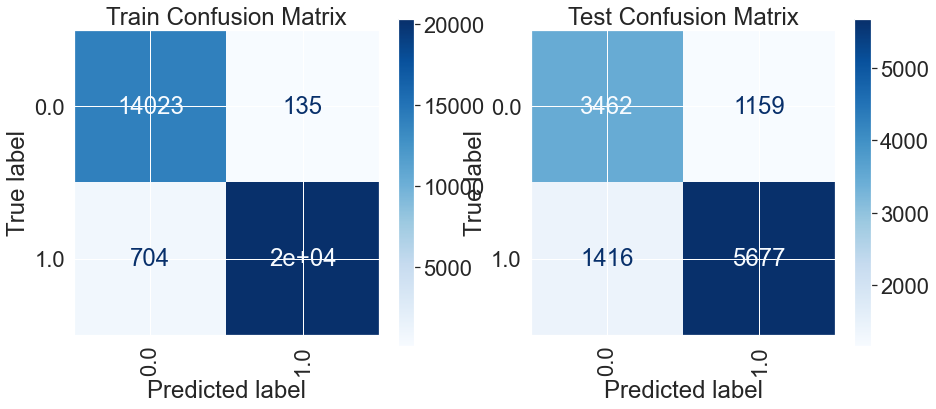

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73      4621
         1.0       0.83      0.80      0.82      7093

    accuracy                           0.78     11714
   macro avg       0.77      0.77      0.77     11714
weighted avg       0.78      0.78      0.78     11714



Random Forest Results:


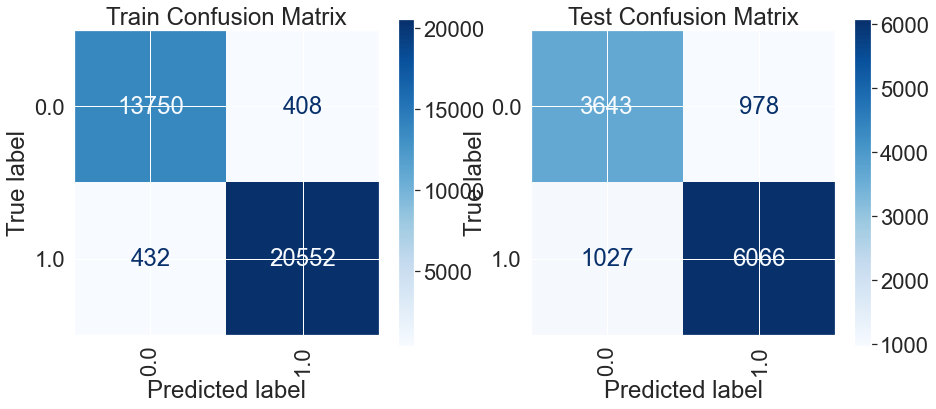

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      4621
         1.0       0.86      0.86      0.86      7093

    accuracy                           0.83     11714
   macro avg       0.82      0.82      0.82     11714
weighted avg       0.83      0.83      0.83     11714



XGBoost Results:
[21:24:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


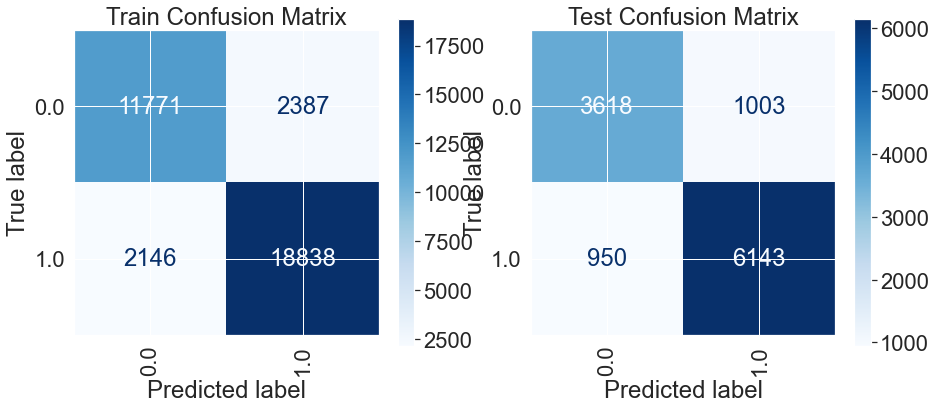

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      4621
         1.0       0.86      0.87      0.86      7093

    accuracy                           0.83     11714
   macro avg       0.83      0.82      0.83     11714
weighted avg       0.83      0.83      0.83     11714



Support Vector Machine Results:


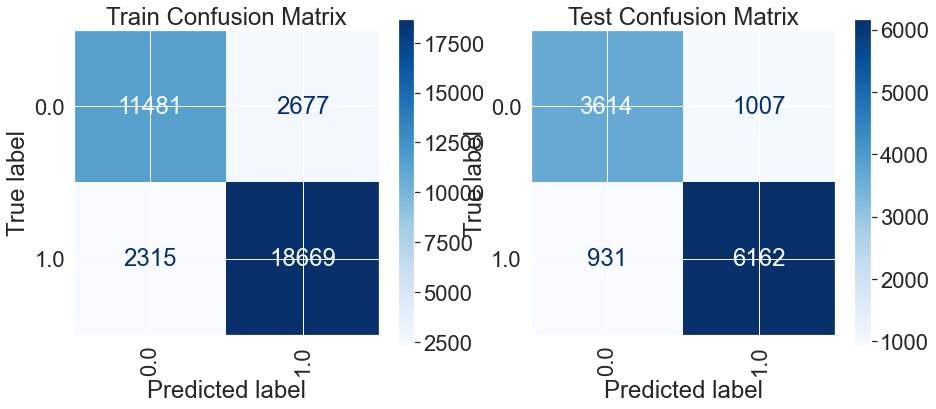

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      4621
         1.0       0.86      0.87      0.86      7093

    accuracy                           0.83     11714
   macro avg       0.83      0.83      0.83     11714
weighted avg       0.83      0.83      0.83     11714





,Precision Score,Recall Score,Accuracy Score,F1 Score
Logistic Regression,82.78%,82.51%,83.48%,82.64%
K-Nearest Neighbors,73.59%,73.03%,74.74%,73.26%
Naive Bayes,79.53%,78.18%,80.06%,78.68%
Decision Tree,77.01%,77.48%,78.02%,77.20%
Random Forest,82.06%,82.18%,82.88%,82.12%
XGBoost,82.58%,82.45%,83.33%,82.52%
Support Vector Machine,82.73%,82.54%,83.46%,82.63%


The model with the highest precision score is Logistic Regression.
The model with the highest recall score is Support Vector Machine.
The model with the highest accuracy score is Logistic Regression.
The model with the highest F1 score is Logistic Regression.


In [11]:
models_2 = m(x2_train, x2_test, y2_train, y2_test)

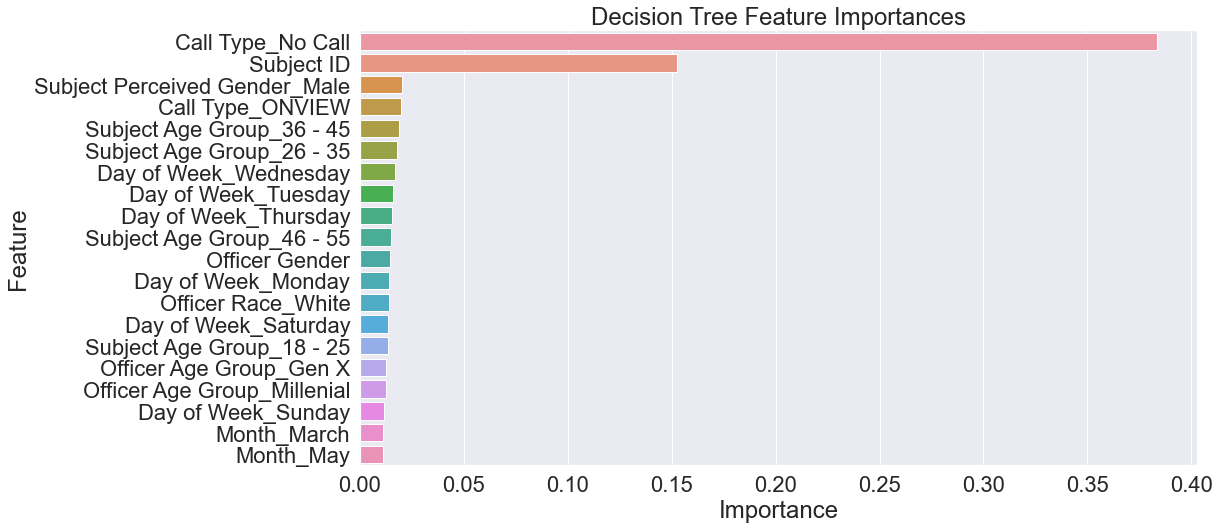

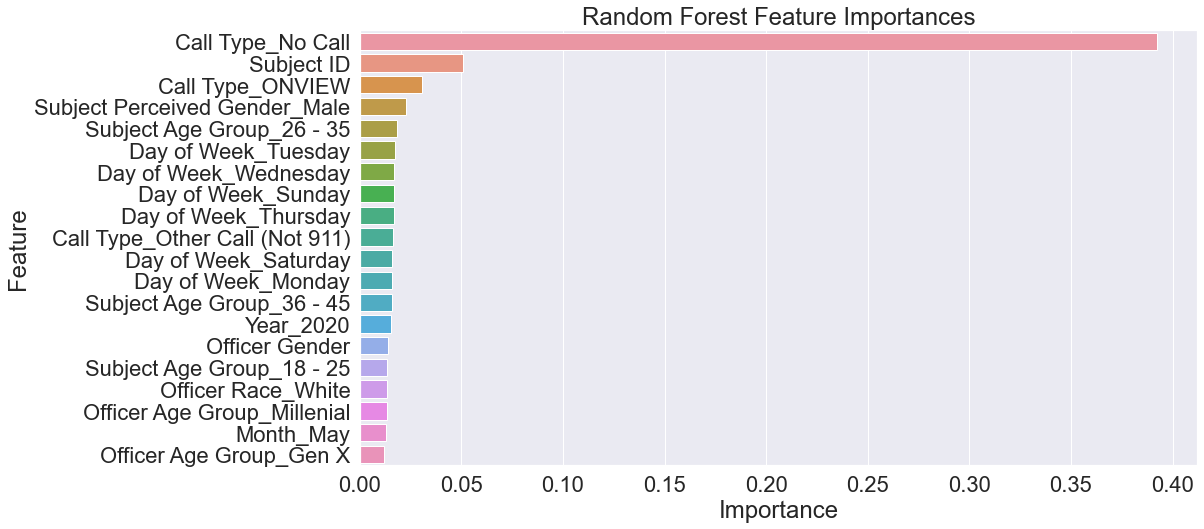

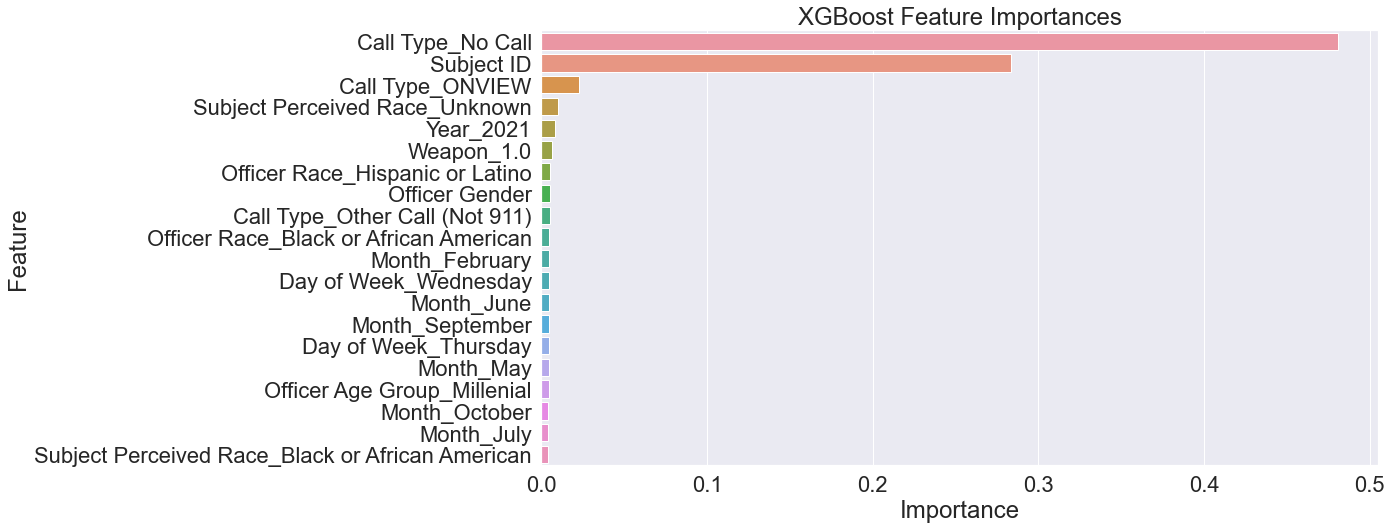

In [12]:
plot_importances(models_2[3], x_train.columns, title = f'Decision Tree Feature Importances')
plot_importances(models_2[4], x_train.columns, title = f'Random Forest Feature Importances')
plot_importances(models_2[5], x_train.columns, title = f'XGBoost Feature Importances')

## Iteration 2 -- Random Forest Parameter Tuning

Write something here

In [13]:
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [30, 60, 100],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [17]:
rf_gs_clf = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_gs_clf.fit(x2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 100]})

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 60}


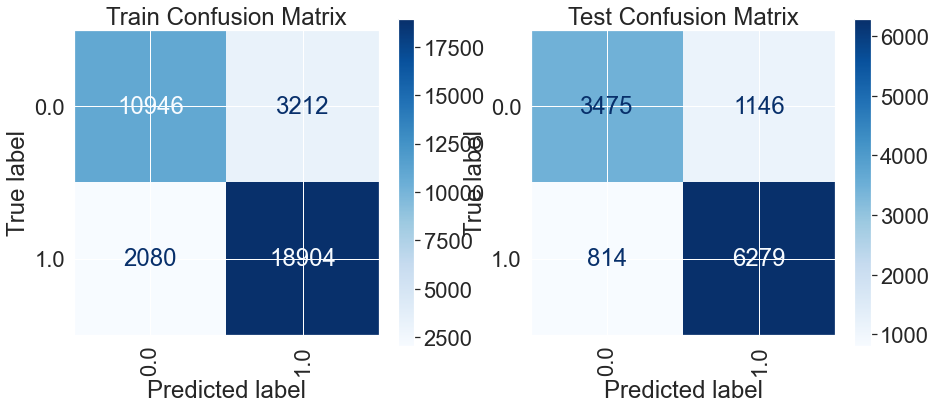

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      4621
         1.0       0.85      0.89      0.86      7093

    accuracy                           0.83     11714
   macro avg       0.83      0.82      0.82     11714
weighted avg       0.83      0.83      0.83     11714





In [18]:
print(f"Optimal Parameters: {rf_gs_clf.best_params_}")

metrics(rf_gs_clf, x2_train, y2_train, x2_test, y2_test)

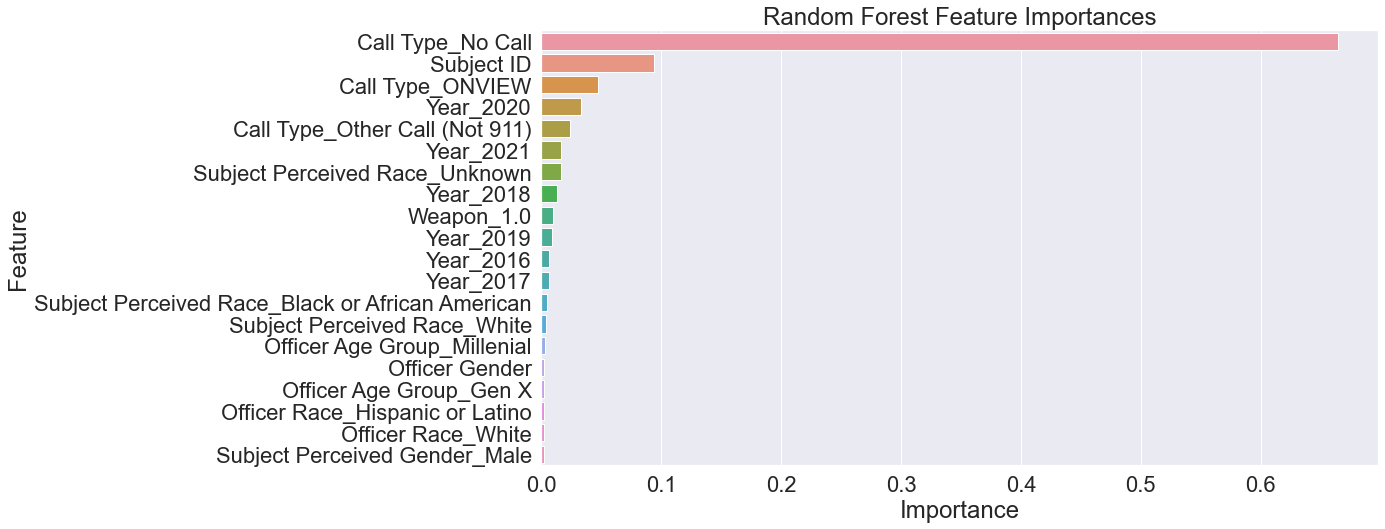

In [19]:
plot_importances(rf_gs_clf.best_estimator_, x_train.columns, title = f'Random Forest Feature Importances')

## Iteration 3 -- XGBoost Parameter Tuning

In [20]:
xgb_param_grid = {
    'n_estimators': [10, 50, 100], #50
    'max_depth': [3, 4, 5], #4
    'gamma': [0, 1, 5], #5
    'min_child_weight': [0, 1, 2], #1
    'subsample': [0.5, 0.75, 1.0] #1
}

In [21]:
xgb_gs_clf = GridSearchCV(XGBClassifier(use_label_encoder=False, n_jobs=-1, eval_metric='mlogloss'), xgb_param_grid, cv=5)
xgb_gs_clf.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=N

Optimal Parameters: {'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}


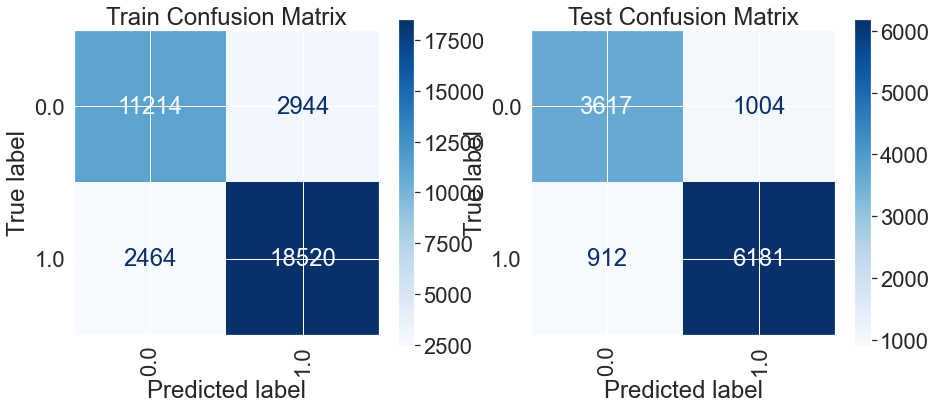

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      4621
         1.0       0.86      0.87      0.87      7093

    accuracy                           0.84     11714
   macro avg       0.83      0.83      0.83     11714
weighted avg       0.84      0.84      0.84     11714





In [22]:
print(f"Optimal Parameters: {xgb_gs_clf.best_params_}")

metrics(xgb_gs_clf.best_estimator_, x2_train, y2_train, x2_test, y2_test)

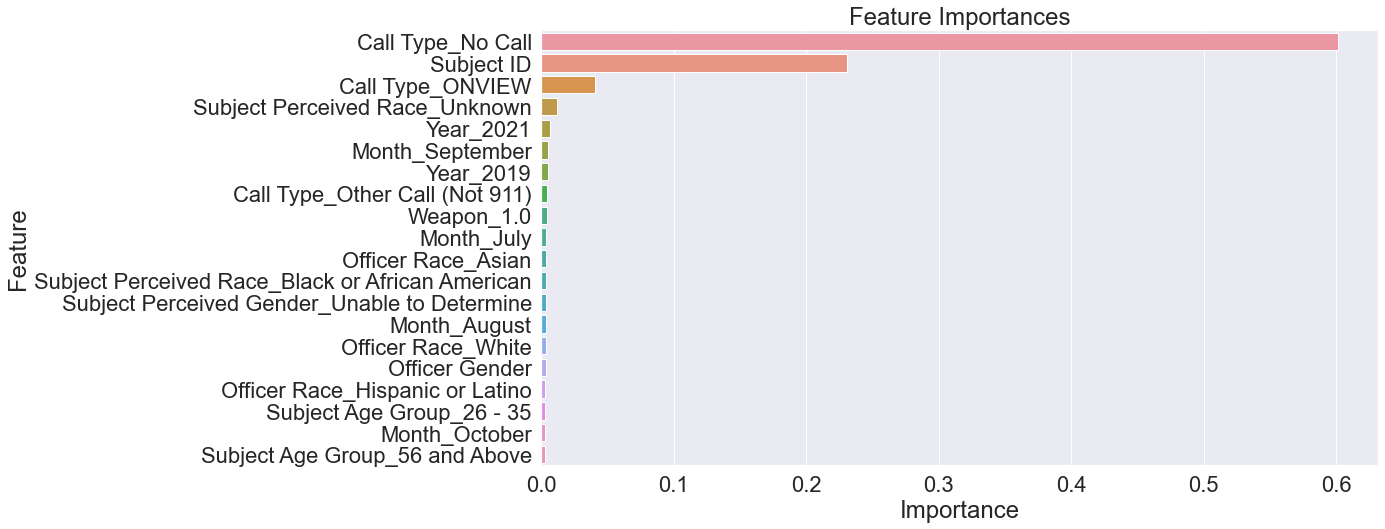

In [23]:
plot_importances(xgb_gs_clf.best_estimator_, x_train.columns)